In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path =r'C:\Users\Piyushkumar\Documents\GitHub\predictcritical\thermalpower' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

frame.describe(include=['O'])
frame.info()
df= frame.copy()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121446 entries, 0 to 2669
Data columns (total 17 columns):
Date                                   121446 non-null object
Region                                 121446 non-null object
Station Name                           121446 non-null object
Mode of Transport                      121446 non-null object
Station Name.1                         121446 non-null object
Utility                                121446 non-null object
Sector                                 121446 non-null object
Capacity                               121446 non-null float64
Normative Stocks Required (In Days)    121446 non-null float64
Daily Requirement                      121446 non-null float64
Actual Stock - Import                  121446 non-null float64
Actual Stock - Indigenous              121446 non-null float64
Actual Stock - Total                   121446 non-null float64
Actual Stock - Days                    121446 non-null int64
Critical          

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,NaN,NaN,NaN
1,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,NaN,NaN,NaN
2,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,Critical,Super Critical,NaN
3,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,NaN,NaN,NaN
4,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,Critical,NaN,NaN


In [2]:
#df = df.set_index(df['Date'])
#df= df.drop('Date', axis = 1)
all_days = pd.date_range(df.index.min(), df.index.max(), freq='D')
df.head()
df.reset_index(drop=True, inplace=True)

In [247]:
df.describe(include='all')
df[df.Critical.notnull()].head(5000)[df['Actual Stock - Days'] >= 6]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
5,2009-04-01,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,0.00,59.82,59.82,6,Critical,NaN,NaN
12,2009-04-01,NORTHERN,UTTAR PRADESH,RAIL,HARDUAGANJ TPS,UTTAR PRADESH RAJYA VIDYUT UTPADAN NIGAM LIMITED,STATE,665.0,25.0,3.0,0.00,16.63,16.63,6,Critical,NaN,NaN
46,2009-04-01,SOUTHERN,ANDHRA PRADESH,RAIL,RAYALASEEMA TPS,ANDHRA PRADESH POWER GENERATION CORP. LIMITED.,STATE,1050.0,25.0,15.8,0.00,90.56,90.56,6,Critical,NaN,NaN
69,2009-04-01,EASTERN,WEST BENGAL,RAIL,D.P.L. TPS,DURGAPUR PROJECTS LIMITED,STATE,630.0,20.0,10.0,0.00,56.95,56.95,6,Critical,NaN,NaN
87,2009-04-02,SOUTHERN,ANDHRA PRADESH,RAIL,RAYALASEEMA TPS,ANDHRA PRADESH POWER GENERATION CORP. LIMITED.,STATE,1050.0,25.0,15.8,0.00,93.59,93.59,6,Critical,NaN,NaN
96,2009-04-02,EASTERN,BIHAR,RAIL,BARAUNI TPS,BIHAR STATE ELECTRICITY BOARD,STATE,210.0,20.0,0.7,0.00,3.70,3.70,6,Critical,NaN,NaN
110,2009-04-02,EASTERN,WEST BENGAL,RAIL,D.P.L. TPS,DURGAPUR PROJECTS LIMITED,STATE,630.0,20.0,10.0,0.00,63.79,63.79,6,Critical,NaN,NaN
124,2009-04-02,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,18.14,38.76,56.90,6,Critical,NaN,NaN
161,2009-04-03,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,22.14,38.20,60.34,6,Critical,NaN,NaN
202,2009-04-03,SOUTHERN,ANDHRA PRADESH,RAIL,RAYALASEEMA TPS,ANDHRA PRADESH POWER GENERATION CORP. LIMITED.,STATE,1050.0,25.0,15.8,0.00,94.05,94.05,6,Critical,NaN,NaN


In [248]:
df[df.Critical.notnull()].head(5000)[df['Actual Stock - Days'] >= 7]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks


In [193]:
# A plant is tagged ciritical when the available stock for number of days goes below 7 days

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Region'] = df['Region'].astype('category')
df['Station Name'] = df['Station Name'].astype('category')
df['Mode of Transport'] = df['Mode of Transport'].astype('category')
df['Station Name.1'] = df['Station Name.1'].astype('category')
df['Utility'] = df['Utility'].astype('category')
df['Sector'] = df['Sector'].astype('category')
df['Critical'] = df['Critical'].map({'Critical': 1})
df['Super Critical'] = df['Super Critical'].map({'Super Critical': 1})
df['Critical'].fillna(value = 0, inplace =True)
df['Super Critical'].fillna(value = 0, inplace =True)
df.describe(include='all')


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
count,121446,121446,121446,121446,121446,121446,121446,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,30506
unique,1461,4,16,4,100,35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,2012-03-18 00:00:00,EASTERN,WEST BENGAL,RAIL,ROPAR TPS,NTPC LIMITED.,STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less Receipt
freq,95,35445,19325,91079,1461,21900,76107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11581
first,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1129.157873,22.591906,13.994799,3.676711,133.287357,136.964021,12.348451,0.373154,0.208438,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.700708,5.256800,10.880320,15.370966,140.712095,140.632403,11.547079,0.483644,0.406193,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,15.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,20.000000,6.400000,0.000000,34.730000,38.040000,4.000000,0.000000,0.000000,NaN


In [250]:
df[df.Critical == 1].head(5000)[df['Actual Stock - Days'] >= 7]
values = df[df.Critical == 1]
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45318 entries, 2 to 121445
Data columns (total 17 columns):
Date                                   45318 non-null datetime64[ns]
Region                                 45318 non-null category
Station Name                           45318 non-null category
Mode of Transport                      45318 non-null category
Station Name.1                         45318 non-null category
Utility                                45318 non-null category
Sector                                 45318 non-null category
Capacity                               45318 non-null float64
Normative Stocks Required (In Days)    45318 non-null float64
Daily Requirement                      45318 non-null float64
Actual Stock - Import                  45318 non-null float64
Actual Stock - Indigenous              45318 non-null float64
Actual Stock - Total                   45318 non-null float64
Actual Stock - Days                    45318 non-null int64
Critical   

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [220]:
df.groupby('Station Name.1').tail(5000)

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.00,57.03,57.03,18,0.0,0.0,NaN
1,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.00,105.08,105.08,48,0.0,0.0,NaN
2,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.00,13.17,13.17,1,1.0,1.0,NaN
3,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.00,14.96,14.96,7,0.0,0.0,NaN
4,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.00,111.27,111.27,4,1.0,0.0,NaN
5,2009-04-01,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,0.00,59.82,59.82,6,1.0,0.0,NaN
6,2009-04-01,NORTHERN,PUNJAB,RAIL,GH TPS (LEH.MOH.),PUNJAB STATE POWER CORP. LTD.,STATE,920.0,30.0,14.5,0.00,36.95,36.95,3,1.0,1.0,NaN
7,2009-04-01,NORTHERN,PUNJAB,RAIL,GND TPS(BHATINDA),PUNJAB STATE POWER CORP. LTD.,STATE,440.0,30.0,6.5,0.00,82.63,82.63,13,0.0,0.0,NaN
8,2009-04-01,NORTHERN,PUNJAB,RAIL,ROPAR TPS,PUNJAB STATE POWER CORP. LTD.,STATE,1260.0,30.0,20.7,0.00,177.84,177.84,9,0.0,0.0,NaN
9,2009-04-01,NORTHERN,RAJASTHAN,RAIL,KOTA TPS,RAJASTHAN RAJYA VIDYUT UTPADAN NIGAM LIMITED,STATE,1240.0,30.0,20.2,0.00,230.95,230.95,11,0.0,0.0,NaN


In [251]:
df[df.Critical.isnull()].head()

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks


In [4]:
df.set_index(df['Date'], inplace=True)
df.head()


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
Date,,,,,,,,,,,,,,,,,
2009-04-01,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,0.0,0.0,NaN
2009-04-01,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,0.0,0.0,NaN
2009-04-01,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,1.0,1.0,NaN
2009-04-01,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,0.0,0.0,NaN
2009-04-01,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,1.0,0.0,NaN


In [5]:
df.drop('Date',axis =1, inplace =True)
df.head()

,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
Date,,,,,,,,,,,,,,,,
2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,0.0,0.0,NaN
2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,0.0,0.0,NaN
2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,1.0,1.0,NaN
2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,0.0,0.0,NaN
2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,1.0,0.0,NaN


In [6]:
def reindex_by_date(df):
    dates = pd.date_range(df.index.min(), df.index.max())
    return df.reindex(dates).fillna(method ='ffill' )

df1 = df.groupby('Station Name.1').apply(reindex_by_date)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 121887 entries, (AMAR KANTAK, 2009-01-01 00:00:00) to (YAMUNA NAGAR TPS, 2012-12-31 00:00:00)
Data columns (total 16 columns):
Region                                 121887 non-null category
Station Name                           121887 non-null category
Mode of Transport                      121887 non-null category
Station Name.1                         121887 non-null category
Utility                                121887 non-null category
Sector                                 121887 non-null category
Capacity                               121887 non-null float64
Normative Stocks Required (In Days)    121887 non-null float64
Daily Requirement                      121887 non-null float64
Actual Stock - Import                  121887 non-null float64
Actual Stock - Indigenous              121887 non-null float64
Actual Stock - Total                   121887 non-null float64
Actual Stock - Days                    121887 non-null float6

In [258]:
#df1.drop('Date',axis =1, inplace=True)
df1.drop('Station Name.1',axis =1, inplace=True)
df1 = df1.reset_index()

In [259]:
df1.describe(include='all')

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
count,121887,121887,121887,121887,121887,121887,121887,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,113378
unique,100,1461,4,16,4,35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,YAMUNA NAGAR TPS,2012-03-26 00:00:00,EASTERN,WEST BENGAL,RAIL,NTPC LIMITED.,STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less Receipt
freq,1461,95,35625,19434,91480,21915,76329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45010
first,NaN,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1128.054308,22.592193,13.979022,3.665533,133.133679,136.799165,12.345697,0.373174,0.208464,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.338267,5.252886,10.873091,15.346892,140.605019,140.530827,11.550393,0.483650,0.406212,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,15.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,20.000000,6.400000,0.000000,34.720000,38.030000,4.000000,0.000000,0.000000,NaN


In [261]:
values = df1[df1.Critical == 1]
values.info()
# There were 45318 critical incidents before adding missing dates and doing forward fill. Now we have 45485 critical incidents. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45485 entries, 151 to 121758
Data columns (total 17 columns):
Station Name.1                         45485 non-null category
level_1                                45485 non-null datetime64[ns]
Region                                 45485 non-null category
Station Name                           45485 non-null category
Mode of Transport                      45485 non-null category
Utility                                45485 non-null category
Sector                                 45485 non-null category
Capacity                               45485 non-null float64
Normative Stocks Required (In Days)    45485 non-null float64
Daily Requirement                      45485 non-null float64
Actual Stock - Import                  45485 non-null float64
Actual Stock - Indigenous              45485 non-null float64
Actual Stock - Total                   45485 non-null float64
Actual Stock - Days                    45485 non-null float64
Critica

In [263]:
df1[df1.Critical == 1][df1['Actual Stock - Days'] >7]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks


In [267]:
df1.describe(include='all')

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
count,121887,121887,121887,121887,121887,121887,121887,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,113378
unique,100,1461,4,16,4,35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,YAMUNA NAGAR TPS,2012-03-26 00:00:00,EASTERN,WEST BENGAL,RAIL,NTPC LIMITED.,STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less Receipt
freq,1461,95,35625,19434,91480,21915,76329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45010
first,NaN,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1128.054308,22.592193,13.979022,3.665533,133.133679,136.799165,12.345697,0.373174,0.208464,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.338267,5.252886,10.873091,15.346892,140.605019,140.530827,11.550393,0.483650,0.406212,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,15.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,20.000000,6.400000,0.000000,34.720000,38.030000,4.000000,0.000000,0.000000,NaN


In [345]:
value = df1['Actual Stock - Total'] - df1['Actual Stock - Import'] - df1['Actual Stock - Indigenous']
value.describe()

count    121887.000000
mean         -0.000046
std           0.001664
min          -0.010000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.010000
dtype: float64

In [347]:
df1.head(50)

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,AMAR KANTAK,2009-01-01,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.44,102.44,18.0,0.0,0.0,NaN
1,AMAR KANTAK,2009-01-02,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.44,102.44,18.0,0.0,0.0,NaN
2,AMAR KANTAK,2009-01-03,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.37,102.37,18.0,0.0,0.0,NaN
3,AMAR KANTAK,2009-01-04,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.65,102.65,18.0,0.0,0.0,NaN
4,AMAR KANTAK,2009-01-05,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.15,102.15,18.0,0.0,0.0,NaN
5,AMAR KANTAK,2009-01-06,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.73,101.73,18.0,0.0,0.0,NaN
6,AMAR KANTAK,2009-01-07,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.91,101.91,18.0,0.0,0.0,NaN
7,AMAR KANTAK,2009-01-08,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.69,101.69,18.0,0.0,0.0,NaN
8,AMAR KANTAK,2009-01-09,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.48,101.48,18.0,0.0,0.0,NaN
9,AMAR KANTAK,2009-01-10,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,99.87,99.87,18.0,0.0,0.0,NaN


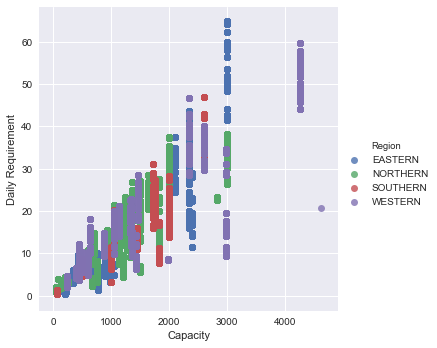

In [352]:
sns.lmplot('Capacity', 'Daily Requirement',
           data=df1,
           fit_reg=False,
           hue="Region"
          )
plt.show()

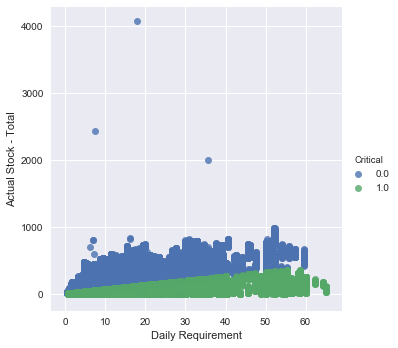

In [356]:
sns.lmplot('Daily Requirement', 'Actual Stock - Total',
           data=df1,
           fit_reg=False,
           hue="Critical"
          )
plt.show()

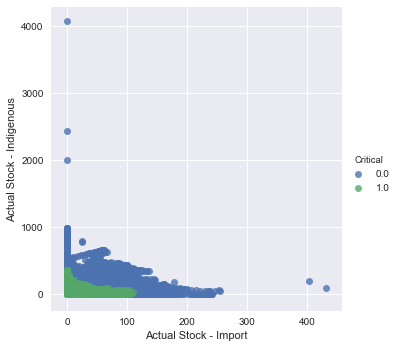

In [371]:
sns.lmplot('Actual Stock - Import', 'Actual Stock - Indigenous',
           data=df1,
           fit_reg=False,
           hue="Critical"
          )
plt.show()

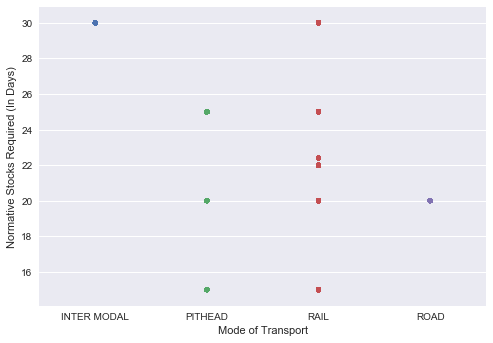

In [375]:
sns.stripplot(x="Mode of Transport", y="Normative Stocks Required (In Days)", data=df1);
plt.show()

In [387]:
sns.tsplot(data=df1.Capacity[df1['Mode of Transport'] == 'PITHEAD'])
plt.show()

MemoryError: 

In [150]:
g= df1.groupby('Station Name.1')
g.count().info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 100 entries, AMAR KANTAK to YAMUNA NAGAR TPS
Data columns (total 16 columns):
level_1                                100 non-null int64
Region                                 100 non-null int64
Station Name                           100 non-null int64
Mode of Transport                      100 non-null int64
Utility                                100 non-null int64
Sector                                 100 non-null int64
Capacity                               100 non-null int64
Normative Stocks Required (In Days)    100 non-null int64
Daily Requirement                      100 non-null int64
Actual Stock - Import                  100 non-null int64
Actual Stock - Indigenous              100 non-null int64
Actual Stock - Total                   100 non-null int64
Actual Stock - Days                    100 non-null int64
Critical                               100 non-null int64
Super Critical                         100 non-null in

In [42]:
def reindex_by_date(df):
    dates = pd.date_range(df.index.min(), df.index.max())
    return df.reindex(dates).fillna(value= 'NaN')

df.groupby('Utility').apply(reindex_by_date).reset_index(0, drop=True)

ValueError: cannot reindex from a duplicate axis